In [42]:
# Load TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras

# Print versions
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.15.0


In [43]:
import pandas as pd
wine_data = pd.read_csv('wine.csv')

# Display dimensions of the dataset
print("Dimensions of the dataset:", wine_data.shape)


Dimensions of the dataset: (1599, 12)


In [44]:
# Check for null values
print("Null values in the dataset:")
print(wine_data.isnull().sum())

# Identify categorical variables (assuming 'quality' is categorical)
categorical_cols = ['quality']

# Encode categorical variables (if necessary, assuming 'quality' as categorical)
wine_data_encoded = pd.get_dummies(wine_data, columns=categorical_cols, drop_first=True)

# Display first few rows of encoded dataset
print("Encoded dataset preview:")
print(wine_data_encoded.head())


Null values in the dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Encoded dataset preview:
   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality_good
0            7.4              0.70         0.00  ...       0.56      9.4         False
1            7.8              0.88         0.00  ...       0.68      9.8         False
2            7.8              0.76         0.04  ...       0.65      9.8         False
3           11.2              0.28         0.56  ...       0.58      9.8          True
4            7.4              0.70         0.00  ...       0.56      9.4         False

[5 rows x 12 columns]


In [46]:
# Separate features (X) and target (y)
X = wine_data_encoded.drop(columns=['quality_good'])
y = wine_data_encoded['quality_good']

# Assuming 'quality' is binary (1 for good quality, 0 for not good)
# If 'quality' is not binary, you may need different handling for the output layer.


In [47]:
from sklearn.model_selection import train_test_split

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)


Training set: (959, 11) (959,)
Validation set: (320, 11) (320,)
Test set: (320, 11) (320,)


In [48]:
from sklearn.preprocessing import StandardScaler

# Initialize a scaler
scaler = StandardScaler()

# Fit on training data
X_train_scaled = scaler.fit_transform(X_train)

# Apply the scaler to validation and test sets
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the model
model = Sequential()

# Add hidden layers
model.add(Dense(64, activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Add output layer (assuming binary classification)
model.add(Dense(1, activation='sigmoid'))

# Print model summary
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                768       
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 16)                528       
                                                                 
 dense_13 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3393 (13.25 KB)
Trainable params: 3393 (13.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/50
30/30 [==============================] - 1s 8ms/step - loss: 0.6775 - accuracy: 0.5558 - val_loss: 0.6276 - val_accuracy: 0.6938
Epoch 2/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5998 - accuracy: 0.7226 - val_loss: 0.5712 - val_accuracy: 0.7531
Epoch 3/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5385 - accuracy: 0.7466 - val_loss: 0.5523 - val_accuracy: 0.7563
Epoch 4/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5139 - accuracy: 0.7539 - val_loss: 0.5345 - val_accuracy: 0.7594
Epoch 5/50
30/30 [==============================] - 0s 4ms/step - loss: 0.4995 - accuracy: 0.7664 - val_loss: 0.5398 - val_accuracy: 0.7688
Epoch 6/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4913 - accuracy: 0.7654 - val_loss: 0.5319 - val_accuracy: 0.7688
Epoch 7/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4820 - accuracy: 0.7727 - val_loss: 0.5279 - val_accuracy: 0.7625
Epoch 8/50
30/30 [==

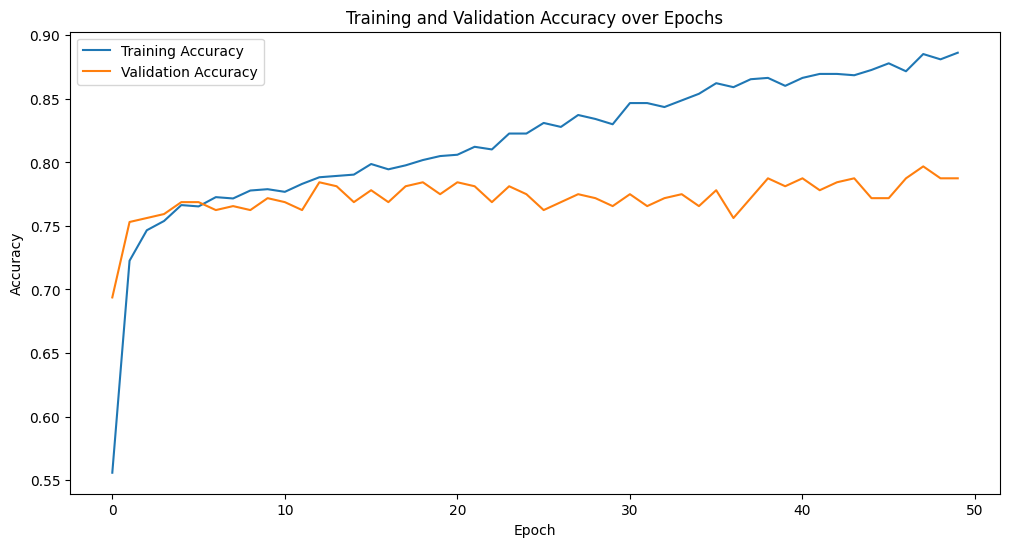

10/10 [==============================] - 0s 2ms/step - loss: 0.4993 - accuracy: 0.7969
Test Accuracy: 0.7969


In [51]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fit the model
history = model.fit(X_train_scaled, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_val_scaled, y_val))



history_df = pd.DataFrame(history.history)

# Plot the model's training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy over Epochs')
plt.show()

# Q19. Evaluate the model's performance using the test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
